In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv("sensors/gnss/vehicle-id-1412.csv")
df_1.head()

,id,timestamp,lat,long,alt,speed
0,1412,2024-05-31 10:47:00.587112,261.512817,1.969076,0.001858,7.998434
1,1412,2024-05-31 10:47:08.599314,334.903320,24.478662,0.001845,8.072717
2,1412,2024-05-31 10:47:16.893001,334.876587,38.879551,0.001849,0.000000
3,1412,2024-05-31 10:47:25.186250,334.876587,38.879551,0.001849,0.000000
4,1412,2024-05-31 10:47:33.372763,334.876587,38.879551,0.001849,0.000000


In [3]:
df_1.describe()

,id,lat,long,alt,speed
count,110.0,110.000000,110.000000,110.000000,110.000000
mean,1412.0,218.993811,118.766692,0.001798,4.994501
std,0.0,110.379503,106.033894,0.000153,5.554438
min,1412.0,1.954272,-2.042283,0.001245,0.000000
25%,1412.0,113.140257,21.721696,0.001680,0.000000
50%,1412.0,198.386391,75.894104,0.001843,3.744174
75%,1412.0,336.486404,195.154781,0.001855,8.070985
max,1412.0,392.335815,330.607452,0.002557,22.275076


## print car velocity at each point of the map

<AxesSubplot:xlabel='long', ylabel='lat'>

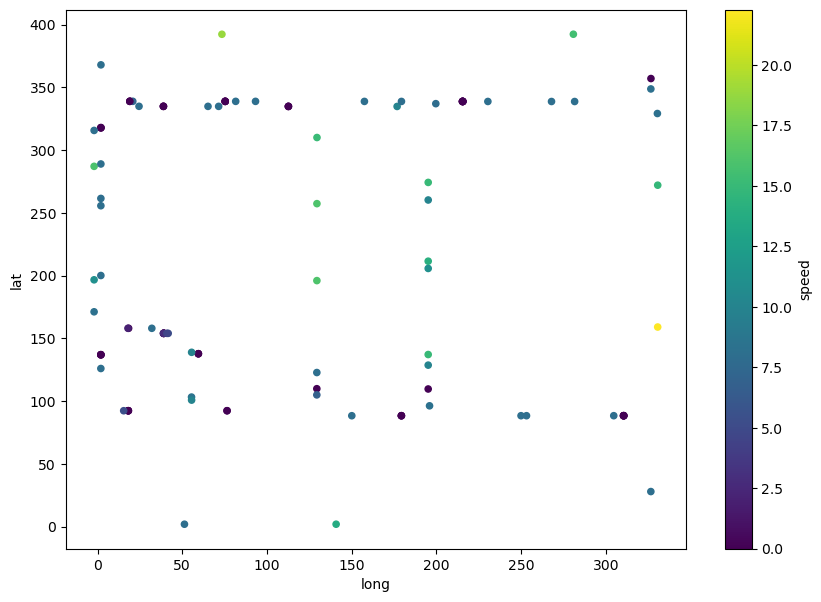

In [4]:
df_1.plot.scatter(x="long",y="lat", c='speed', colormap='viridis', figsize=(10,7))

In [5]:
df_2 = pd.read_csv("sensors/gnss/vehicle-id-1759.csv")
df_2.head()

,id,timestamp,lat,long,alt,speed
0,1759,2024-05-31 11:04:11.806531,268.548126,1.967556,0.001813,8.141425
1,1759,2024-05-31 11:04:20.297383,334.880219,35.378494,0.001849,8.032954
2,1759,2024-05-31 11:04:28.760863,334.876587,38.879551,0.001849,0.000000
3,1759,2024-05-31 11:04:37.385304,334.876587,38.879551,0.001849,0.000000
4,1759,2024-05-31 11:04:46.339108,334.876587,38.879551,0.001849,0.000000


In [6]:
df_2.describe()

,id,lat,long,alt,speed
count,76.0,76.000000,76.000000,76.000000,76.000000
mean,1759.0,225.553410,96.902553,0.001783,4.823261
std,0.0,106.777714,94.944892,0.000171,5.239477
min,1759.0,79.298752,-2.047126,0.001238,0.000000
25%,1759.0,128.807661,18.469748,0.001678,0.000000
50%,1759.0,193.081436,62.710546,0.001843,6.141005
75%,1759.0,334.852119,129.491016,0.001851,8.064761
max,1759.0,396.372650,330.610291,0.002387,24.144549


## print car velocity at each point of the map (CAR2)

<AxesSubplot:xlabel='long', ylabel='lat'>

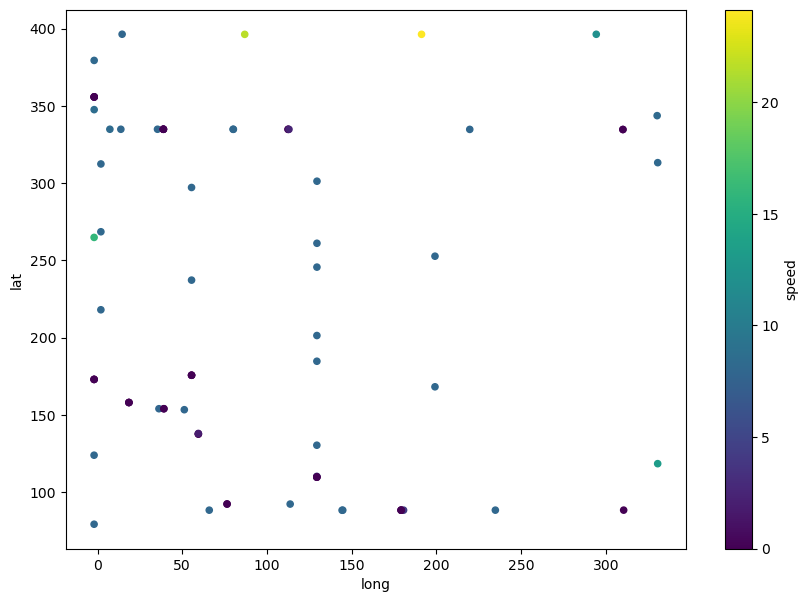

In [7]:
df_2.plot.scatter(x="long",y="lat", c='speed', colormap='viridis', figsize=(10,7))

In [8]:
df = pd.concat([df_1, df_2])

In [9]:
df.head()

,id,timestamp,lat,long,alt,speed
0,1412,2024-05-31 10:47:00.587112,261.512817,1.969076,0.001858,7.998434
1,1412,2024-05-31 10:47:08.599314,334.903320,24.478662,0.001845,8.072717
2,1412,2024-05-31 10:47:16.893001,334.876587,38.879551,0.001849,0.000000
3,1412,2024-05-31 10:47:25.186250,334.876587,38.879551,0.001849,0.000000
4,1412,2024-05-31 10:47:33.372763,334.876587,38.879551,0.001849,0.000000


## print 2 cars trajectories, color by car

<AxesSubplot:xlabel='long', ylabel='lat'>

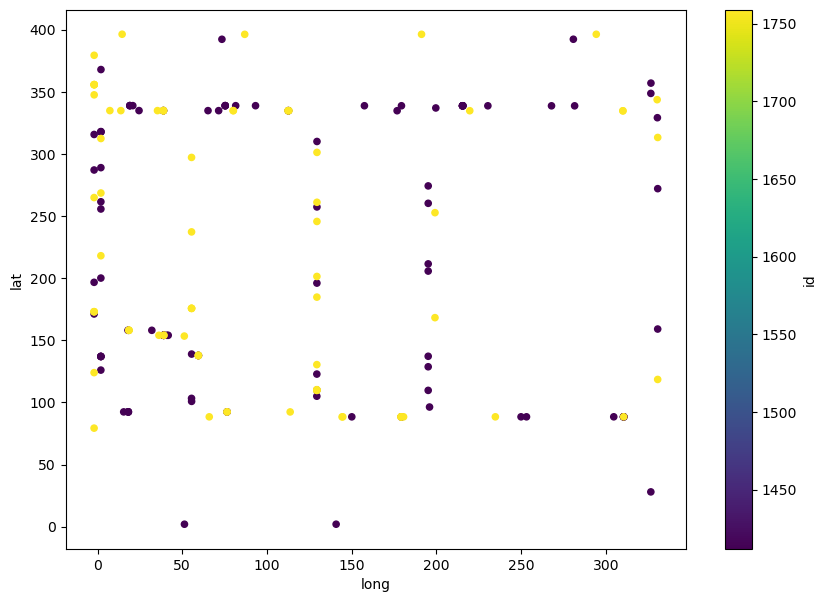

In [10]:
df.plot.scatter(x="long",y="lat", c='id', colormap='viridis', figsize=(10,7))

## print 2 cars trajectories, color by timestamp

In [11]:
# df.plot.scatter(x="long",y="lat", c='timestamp', colormap='viridis', figsize=(10,7))

## Add car 3

<AxesSubplot:xlabel='long', ylabel='lat'>

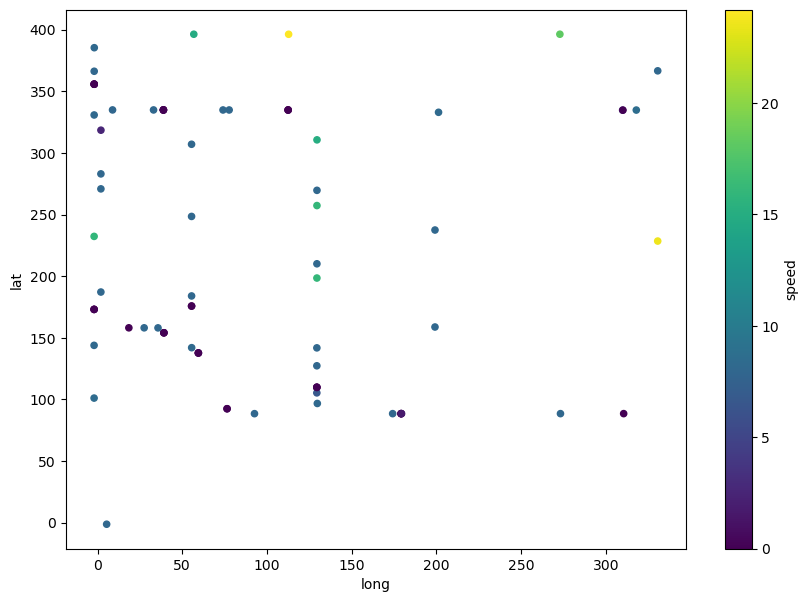

In [12]:
df_3 = pd.read_csv("sensors/gnss/vehicle-id-2453.csv")
df_3.plot.scatter(x="long",y="lat", c='speed', colormap='viridis', figsize=(10,7))

## print trajectories of the 3 cars

<AxesSubplot:xlabel='long', ylabel='lat'>

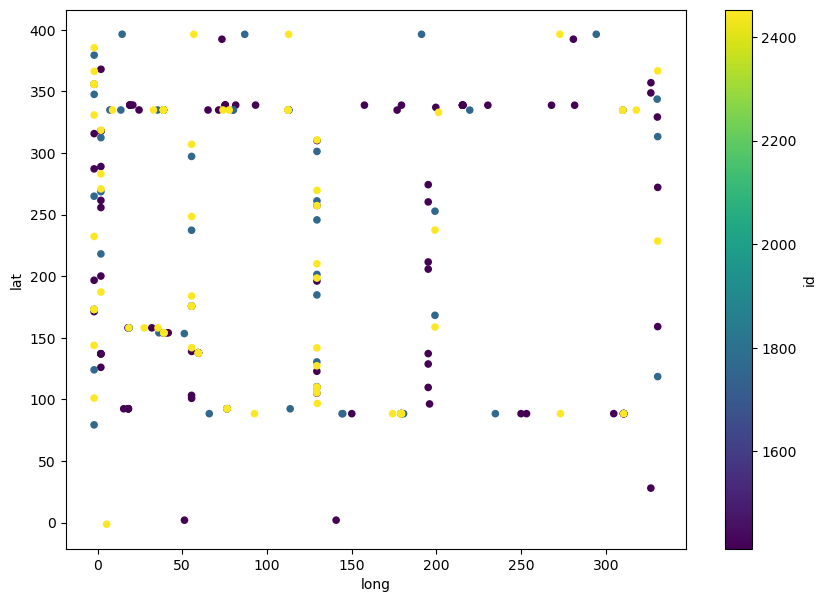

In [13]:
df = pd.concat([df, df_3])
df.plot.scatter(x="long",y="lat", c='id', colormap='viridis', figsize=(10,7))

## Plot trajectories on top of the map
### color = speed

In [14]:
df.loc[df['lat'] <= 5, 'lat'] = 8

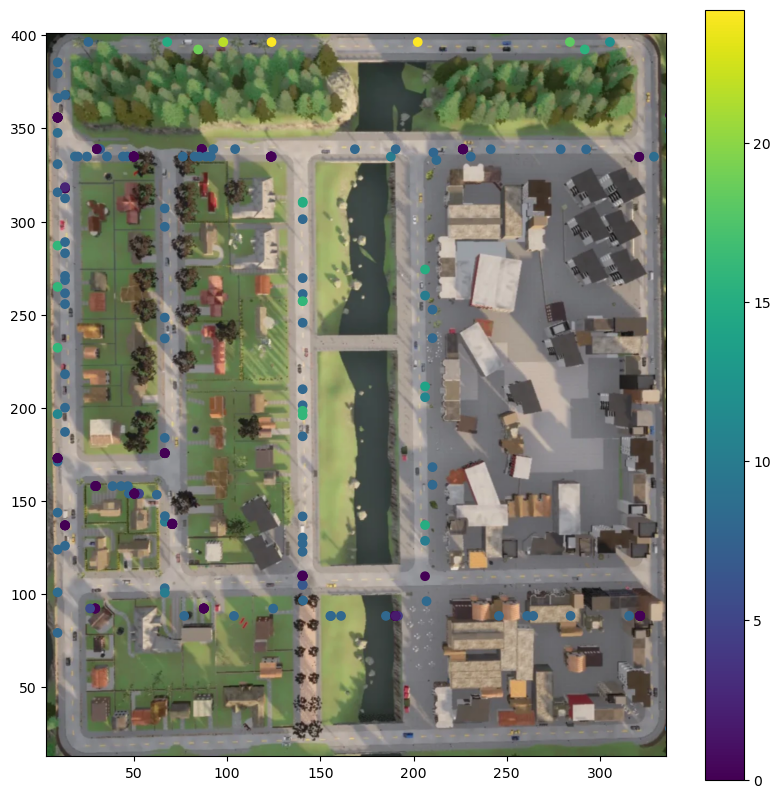

In [15]:
import matplotlib.cm as cm
import numpy as np

# tailored_extent = [df.long.min()-0.0002,
#                    df.long.max() + 0.0002,
#                    df.lat.min()-0.00026,
#                    df.lat.max() + 0.00026]

tailored_extent = [df.long.min()+5,
                   df.long.max()+5,
                   df.lat.min()+5,
                   df.lat.max()+5]

#colors = cm.rainbow(np.linspace(0, 1, 10))
# colors = cm.viridis(np.linspace(0, 8.5, 732))

img = plt.imread("town01aerial_croped.webp")
plt.figure(figsize=(10,10))
#plt.scatter(df.long.values*2,df.lat.values*2,c=df.speed, zorder=1)
plt.scatter(df.long.values+11,df.lat.values,c=df.speed, zorder=1)
plt.colorbar()
plt.imshow(img, zorder=0, extent=tailored_extent);

In [16]:
df

,id,timestamp,lat,long,alt,speed
0,1412,2024-05-31 10:47:00.587112,261.512817,1.969076,0.001858,7.998434
1,1412,2024-05-31 10:47:08.599314,334.903320,24.478662,0.001845,8.072717
2,1412,2024-05-31 10:47:16.893001,334.876587,38.879551,0.001849,0.000000
3,1412,2024-05-31 10:47:25.186250,334.876587,38.879551,0.001849,0.000000
4,1412,2024-05-31 10:47:33.372763,334.876587,38.879551,0.001849,0.000000
...,...,...,...,...,...,...
72,2453,2024-05-31 11:31:56.825353,175.703857,55.489773,0.001857,0.000000
73,2453,2024-05-31 11:32:05.569008,158.007233,35.668797,0.001861,8.038315
74,2453,2024-05-31 11:32:14.452237,143.828735,-2.055186,0.001826,8.136686
75,2453,2024-05-31 11:32:23.446724,101.031471,-2.047888,0.001462,8.424760
